In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

def lcg(seed=42, a=21, c=43, m=200, n=20):
    numbers = []
    x = seed # fixed
    for _ in range(n):
        x = (a * x + c) % m
        numbers.append(x)
    return numbers

def get_points(points_2_pairs=20):
    points = {
        'points_1': np.array([
                    [120, 240],
                    [370, 180],
                    [550, 460],
                    [260, 540]
                    ]),
        'points_2': np.reshape(np.array(lcg(n=2*points_2_pairs)),(-1,2))
    }
    return points

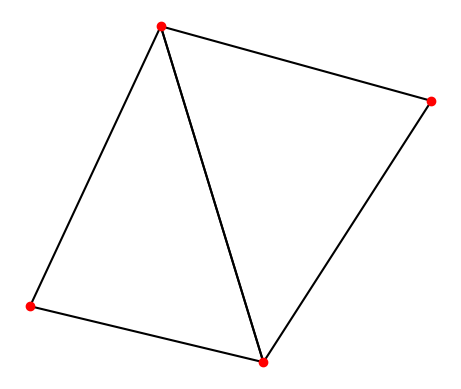

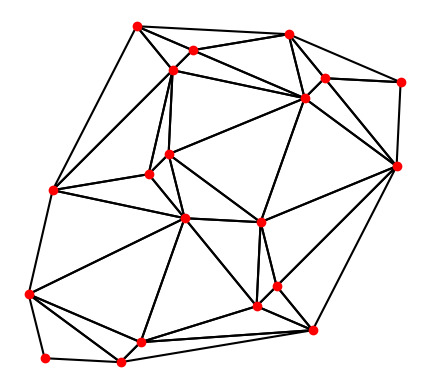

In [33]:
import numpy as np

class DelaunayTriangulation:
    def __init__(self, points):
        self.points = points
        self.triangles = []

    def circumcircle(self, p1, p2, p3):
        x1, y1 = p1
        x2, y2 = p2
        x3, y3 = p3

        det = 2 * (x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2))

        if det == 0: #한직선
            return None

        cx = ((x1**2 + y1**2) * (y2 - y3) + (x2**2 + y2**2) * (y3 - y1) + (x3**2 + y3**2) * (y1 - y2)) / det
        cy = ((x1**2 + y1**2) * (x3 - x2) + (x2**2 + y2**2) * (x1 - x3) + (x3**2 + y3**2) * (x2 - x1)) / det

        r = np.sqrt((x1 - cx)**2 + (y1 - cy)**2)

        return (cx, cy), r

    def point_in_circumcircle(self, point, center, radius):
        return np.sqrt((point[0] - center[0])**2 + (point[1] - center[1])**2) < radius


    def makeDelaunay(self):
        n = len(self.points)
        for i in range(n):
            for j in range(i+1, n):
                for k in range(j+1, n):
                    p1, p2, p3 = self.points[i], self.points[j], self.points[k]
                    circle = self.circumcircle(p1, p2, p3)
                    if circle is None:
                        continue
                    center, radius = circle
                    valid = True
                    for m in range(n):
                        if m != i and m != j and m != k:
                            if self.point_in_circumcircle(self.points[m], center, radius):
                                valid = False
                                break
                    if valid:
                        self.triangles.append([i, j, k])

    def plot(self):
        fig, ax = plt.subplots()

        for triangle in self.triangles:
            vertices = self.points[triangle]
            x = np.append(vertices[:, 0], vertices[0, 0])
            y = np.append(vertices[:, 1], vertices[0, 1])
            ax.plot(x, y, 'k-')

        ax.scatter(self.points[:, 0], self.points[:, 1], color='red', zorder=2)

        ax.set_aspect('equal')
        plt.axis('off')
        plt.show()

for points in get_points().values():
    dt = DelaunayTriangulation(points)
    dt.makeDelaunay()
    dt.plot()

[[1 3 0]
 [3 1 2]]


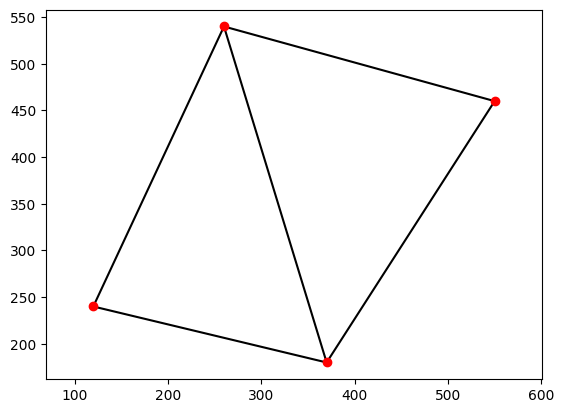

[[ 9  8  6]
 [ 8  9 16]
 [ 8 18  5]
 [18  8 16]
 [19  1 12]
 [ 1  9 12]
 [ 9  1 16]
 [ 1 18 16]
 [18  1 19]
 [10 19 12]
 [14 17  6]
 [ 9 15 12]
 [11  4  7]
 [ 4 11 19]
 [ 4 10  7]
 [10  4 19]
 [11  3 19]
 [ 3 18 19]
 [ 3 11  5]
 [18  3  5]
 [ 0 10 12]
 [10  0 13]
 [15  0 12]
 [ 0 15 13]
 [ 2 15  9]
 [ 2  9  6]
 [17  2  6]
 [ 2 17 13]
 [15  2 13]]


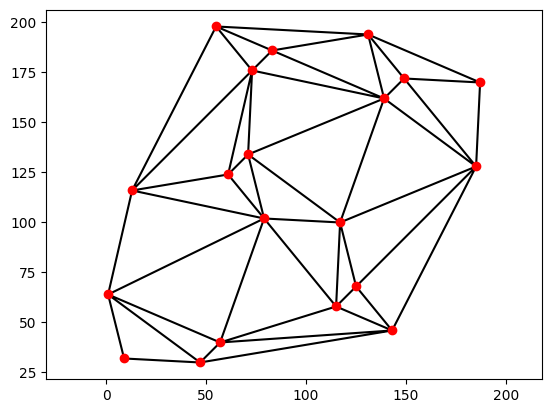

In [16]:
from scipy.spatial import Delaunay


class DelaunayTriangulation:
    def __init__(self, points):
        self.points = points
        self.triangles = Delaunay(points).simplices

    def plot(self):
        print(self.triangles)
        plt.triplot(self.points[:, 0], self.points[:, 1], self.triangles, 'k-')
        plt.scatter(self.points[:, 0], self.points[:, 1], color='red')
        plt.axis('equal')
        plt.show()


for points in get_points().values():
    dt = DelaunayTriangulation(points)
    dt.plot()


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.3MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 504kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.54MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.49MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

(5000, 784)


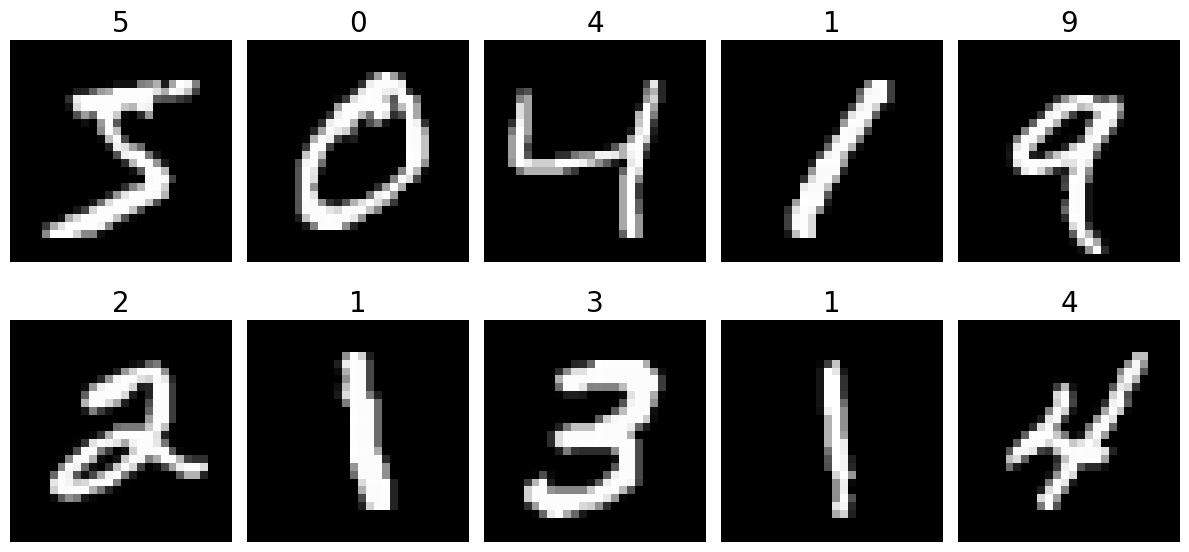

(4500, 784) (500, 784)
Validation accuracy: 0.938
KNN score: 0.938
k: 1, accuracy: 95.60
k: 2, accuracy: 95.00
k: 3, accuracy: 94.60
k: 4, accuracy: 93.80
k: 5, accuracy: 93.80
k: 6, accuracy: 93.40
k: 7, accuracy: 93.40
k: 8, accuracy: 93.60
k: 9, accuracy: 92.80
k: 10, accuracy: 92.80


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import torch
from torchvision import datasets, transforms

# Load MNIST dataset using torchvision
transform = transforms.Compose([transforms.ToTensor()])
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Convert the data into numpy arrays
x_digit = mnist_data.data[:5000].numpy()
y_digit = mnist_data.targets[:5000].numpy()

# Reshape x_digit for the KNN classifier
x_digit = x_digit.reshape(-1, 28 * 28)
print(x_digit.shape)

# Visualize some samples
w, h = 2, 5
fig, axes = plt.subplots(w, h)
fig.set_size_inches(12, 6)
for i in range(w * h):
    axes[i // h, i % h].imshow(x_digit[i].reshape(28, 28), cmap='gray')
    axes[i // h, i % h].set_title(y_digit[i], fontsize=20)
    axes[i // h, i % h].axis('off')
plt.tight_layout()
plt.show()

# Split the data into train and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x_digit, y_digit, stratify=y_digit, random_state=30, test_size=0.1)
print(x_train.shape, x_valid.shape)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(x_train, y_train)
prediction = knn.predict(x_valid)

# Calculate accuracy
print("Validation accuracy:", (prediction == y_valid).mean())
print("KNN score:", knn.score(x_valid, y_valid))

# Experiment with different values of k
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(x_train, y_train)
    score = knn.score(x_valid, y_valid)
    print('k: %d, accuracy: %.2f' % (k, score * 100))
